In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [5]:
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/Baseline_100sam_10ms_clear_all_erp.csv"
dataset =pd.read_csv(path)

In [56]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [60]:
# dataset.iloc[1800,2]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40) 

In [62]:
X_test.shape, y_test.shape

((373, 1428), (373,))

In [63]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([148, 225]))

# Grid search

In [64]:
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 6.5, 10, 20, 100, 1000], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [66]:
# Average Scores
#  print clf.cv_results_
# clf.best_estimator_
# np.mean
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy:0.824 (+/-0.185)


In [70]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8900804289544236
support: 59.5302013423


In [71]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[124,  24],
       [ 17, 208]])

In [72]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.88      0.84      0.86       148
        1.0       0.90      0.92      0.91       225

avg / total       0.89      0.89      0.89       373



In [73]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8811411411411412

In [74]:
clf.best_estimator_

SVC(C=6.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

# Bayesian Optimization

In [76]:
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1,5,10*.65,10**0.651,7,8],'gamma':[0.1,0.0005,0.000612,0.0006815,10**-3.20]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8793565683646113
             precision    recall  f1-score   support

        0.0       0.87      0.82      0.84       148
        1.0       0.89      0.92      0.90       225

avg / total       0.88      0.88      0.88       373



In [77]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.86993993993994

In [78]:
clf.best_estimator_

SVC(C=4.47713304176, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8793565683646113
support: 60.1342281879


In [80]:
# pred=clf.best_estimator_.predict(X_test)
# clf.score(X_test, y_test)  
# # print pred
# # print y_test

In [81]:
# k=0;j=68;
# for i in range(0,21):
#     print k,j
#     k=k+68;j=j+68;

In [82]:
k=0;j=68; acgw=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    print acc
    print k,j
    k=k+68;j=j+68;
#     scores=clf.cv_results_['mean_test_score']
#     print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

0.6032171581769437
0 68
0.6836461126005362
68 136
0.7345844504021448
136 204
0.7319034852546917
204 272
0.7935656836461126
272 340
0.8016085790884718
340 408
0.8310991957104558
408 476
0.7774798927613941
476 544
0.7828418230563002
544 612
0.7560321715817694
612 680
0.7882037533512064
680 748
0.7774798927613941
748 816
0.7908847184986595
816 884
0.7560321715817694
884 952
0.7721179624664879
952 1020
0.7855227882037533
1020 1088
0.7801608579088471
1088 1156
0.7479892761394102
1156 1224
0.7211796246648794
1224 1292
0.6943699731903485
1292 1360
0.7184986595174263
1360 1428


In [83]:
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000700280112045,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [84]:
yr=X_test[:,0:68]
yr.shape

(373, 68)

In [85]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [86]:
X.shape
np.max(acgw)

0.8310991957104558

# Hemisphere

In [87]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8632707774798928
             precision    recall  f1-score   support

        0.0       0.83      0.83      0.83       148
        1.0       0.89      0.88      0.89       225

avg / total       0.86      0.86      0.86       373



In [88]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8577627627627629

In [89]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8632707774798928
support: 53.8926174497


In [90]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000700280112045,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [91]:
# only 34 features 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    print acc
    print k,j
    k=k+34;j=j+34;

0.6032171581769437
0 34
0.67828418230563
34 68
0.6943699731903485
68 102
0.6997319034852547
102 136
0.739946380697051
136 170
0.7587131367292225
170 204
0.7238605898123325
204 238
0.7372654155495979
238 272
0.6997319034852547
272 306
0.6970509383378016
306 340
0.7158176943699732
340 374
0.7184986595174263
374 408
0.7426273458445041
408 442
0.6863270777479893
442 476
0.7426273458445041
476 510
0.7265415549597856
510 544
0.7238605898123325
544 578
0.7050938337801609
578 612
0.6890080428954424
612 646
0.6514745308310992
646 680
0.6702412868632708
680 714


# LH

In [92]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.903485254691689
             precision    recall  f1-score   support

        0.0       0.90      0.85      0.88       148
        1.0       0.91      0.94      0.92       225

avg / total       0.90      0.90      0.90       373



In [93]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8945645645645646

In [94]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.903485254691689
support: 68.5234899329


In [95]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [96]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00140056022409,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [97]:
k=0;j=34; acgl=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    print acc
    print k,j
    k=k+34;j=j+34;

0.6032171581769437
0 34
0.6595174262734584
34 68
0.6836461126005362
68 102
0.7265415549597856
102 136
0.7426273458445041
136 170
0.7667560321715817
170 204
0.7989276139410187
204 238
0.7721179624664879
238 272
0.7479892761394102
272 306
0.7024128686327078
306 340
0.7533512064343163
340 374
0.7211796246648794
374 408
0.7533512064343163
408 442
0.7184986595174263
442 476
0.7238605898123325
476 510
0.7184986595174263
510 544
0.7506702412868632
544 578
0.7158176943699732
578 612
0.6890080428954424
612 646
0.707774798927614
646 680
0.6729222520107239
680 714


In [98]:
t=np.linspace(0,200,21, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [99]:
np.max(acgl)
np.max(a.iloc[:,3])

0.7989276139410187

# Writing the csv data all

In [100]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')

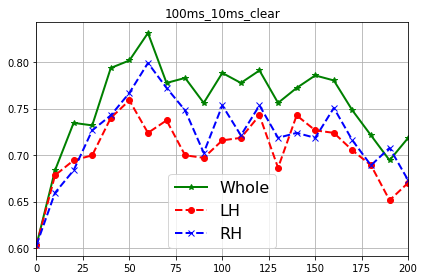

In [101]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("100ms_10ms_clear")
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
# plt.xlabel('Time (ms)',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
# plt.yticks(**axis_font)
# plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [102]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

64.09395973154362

In [96]:
# dall

In [97]:
X_train.shape

(2004, 714)